<a href="https://colab.research.google.com/github/BenLiu983/Spam-Detector-NLP/blob/main/0814_Spam_Detectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS Projects/ds udemy/36 proj/Spam Detector/df.csv')
data.head()

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# rename our columns
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.shape

(5572, 2)

In [6]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [13]:
# % of missing values in each column
miss_per = round(100* (data.isnull().sum()/len(data)), 2)
miss_per

label    0.0
text     0.0
dtype: float64

In [14]:
miss_per.sort_values(ascending=False)

label    0.0
text     0.0
dtype: float64

In [15]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check duplicate
data[data[['label', 'text']].duplicated() == True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [17]:
# drop duplicate
data = data.drop_duplicates()

In [18]:
# sanity check
data[data[['label', 'text']].duplicated() == True]

,label,text


In [ ]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [19]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

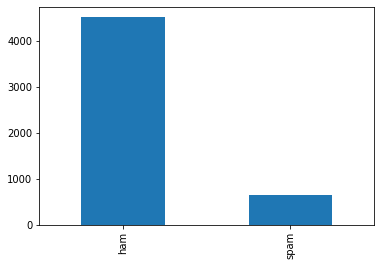

In [20]:
# plot of label
data.label.value_counts().plot(kind="bar")

# 2. EDA

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    msg = msg.lower()
    return msg

In [23]:
# process text messages 
data['text'] = data['text'].apply(review_messages)
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


# 3. Data Prep

In [24]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [25]:
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

# 4. Modeling

In [26]:
# train the classifier
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000)

In [27]:
# prediction
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9845261121856866
[[462   0]
 [  8  47]]


In [ ]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


#5. Text Prediction

In [28]:
# test new messages
def pred(msg):
    msg = vectorizer.transform([msg])
    predition = svm.predict(msg)
    return predition[0]

In [29]:
for i in range(0, 10):
    rand_index = np.random.randint(0, len(data))
    test_sample = data.iloc[rand_index][1]

    print(test_sample)
    print("Text is - " + str(pred(test_sample)) + "\n")

we tried to contact you re our offer of new video phone 750 anytime any network mins half price rental camcorder call 08000930705 or reply for delivery wed
Text is - spam

sure, but make sure he knows we ain't smokin yet
Text is - ham

prakesh is there know.
Text is - ham

sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? this msg is free recd msgs 150p inc vat 2 cancel text stop
Text is - spam

ugh my leg hurts. musta overdid it on mon.
Text is - ham

hi' test on  &lt;#&gt; rd ....
Text is - ham

yar... i tot u knew dis would happen long ago already.
Text is - ham

shuhui has bought ron's present it's a swatch watch...
Text is - ham

omg you can make a wedding chapel in frontierville? why do they get all the good stuff?
Text is - ham

hmm... dunno leh, mayb a bag 4 goigng out dat is not too small. or jus anything except perfume, smth dat i can keep.
Text is - ham

